In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
train_data=pd.read_csv("Train.csv")

In [3]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
#from pandas_profiling import ProfileReport

In [5]:
#profile = ProfileReport(train_data,explorative=True)

In [6]:
#profile.to_widgets()

In [7]:
print ("Rows     : " ,train_data.shape[0])
print ("Columns  : " ,train_data.shape[1])
print ("\nFeatures : \n" ,train_data.columns.tolist())
print ("\nUnique values :  \n",train_data.nunique())

Rows     :  8523
Columns  :  12

Features : 
 ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']

Unique values :  
 Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [8]:
data_description = train_data.describe()
data_description

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].median(),inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

In [11]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data_description = train_data.describe()
data_description

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
import matplotlib.pyplot as plt

In [14]:
for i in train_data:
    print(train_data[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65  12.6   16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6   14.
 16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2   14.5
 13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78  11.85
 18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2    6.32
  4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15   8.5
  7.63   9.285  7.975 15.7    8.985 20.35 

In [15]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map({"low fat":"Low Fat",
                                                                    "Low Fat":"Low Fat",
                                                                    "LF":"Low Fat",
                                                                    "Regular":"Regular",
                                                                    "reg":"Regular"})

In [16]:
print(train_data['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

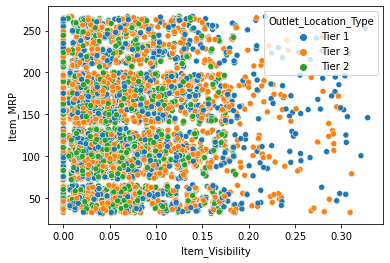

In [17]:
sns.scatterplot(x='Item_Visibility',y="Item_MRP",data=train_data,hue="Outlet_Location_Type")

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

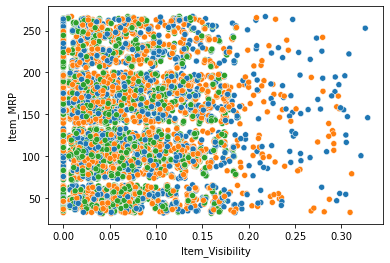

In [18]:
sns.scatterplot(x='Item_Visibility',y="Item_MRP",data=train_data,hue="Outlet_Location_Type",legend=None)

# Observations

- If MRP is high,visibility is less of tier2 and tier3 but tier1 is very high to costly products 
- tier2 having no visibility more 0.17 and 0.18 
- tier3 have some

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

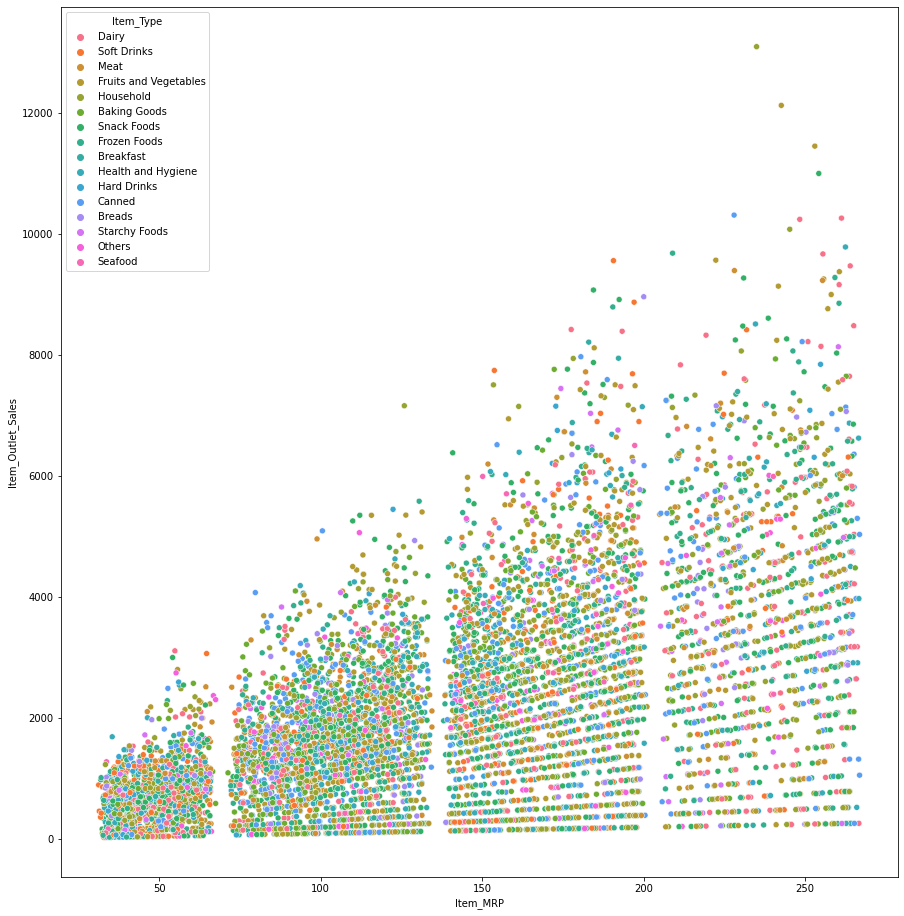

In [19]:
plt.figure(figsize=(15,16))
sns.scatterplot(x='Item_MRP',y="Item_Outlet_Sales",data=train_data,hue="Item_Type")

# Observations

- Household items makes more than 12000 of sales with low MRP
- Fruits also make more than 10000 sales

# Check the countplots of categorical column

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

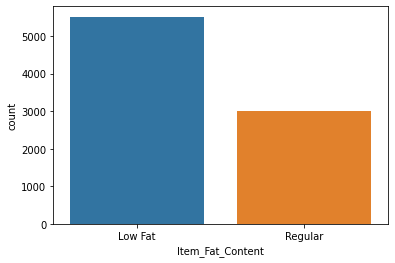

In [20]:
sns.countplot(x='Item_Fat_Content',data=train_data)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

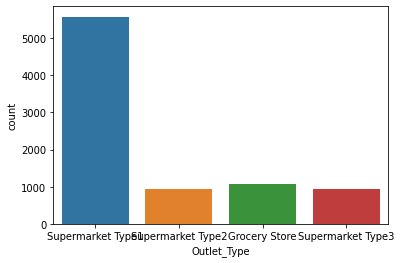

In [21]:
sns.countplot(x='Outlet_Type',data=train_data)

In [22]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
categorical_data=train_data.select_dtypes(include="object")

In [24]:
categorical_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [25]:
column_names=categorical_data.columns

In [26]:
for i in column_names:
    print(train_data[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
['Low Fat' 'Regular']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [27]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

categorical_data['Item_Fat_Content']=label.fit_transform(categorical_data['Item_Fat_Content'])
categorical_data['Item_Type']=label.fit_transform(categorical_data['Item_Type'])
categorical_data['Outlet_Size']=label.fit_transform(categorical_data['Outlet_Size'])
categorical_data['Outlet_Location_Type']=label.fit_transform(categorical_data['Outlet_Location_Type'])
categorical_data['Outlet_Type']=label.fit_transform(categorical_data['Outlet_Type'])
categorical_data['Item_Identifier']=label.fit_transform(categorical_data['Item_Identifier'])
categorical_data['Item_Outlet_Sales']=train_data['Item_Outlet_Sales']

In [28]:
categorical_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,0,4,OUT049,1,0,1,3735.1380
1,8,1,14,OUT018,1,2,2,443.4228
2,662,0,10,OUT049,1,0,1,2097.2700
3,1121,1,6,OUT010,1,2,0,732.3800
4,1297,0,9,OUT013,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,370,0,13,OUT013,0,2,1,2778.3834
8519,897,1,0,OUT045,1,1,1,549.2850
8520,1357,0,8,OUT035,2,1,1,1193.1136
8521,681,1,13,OUT018,1,2,2,1845.5976


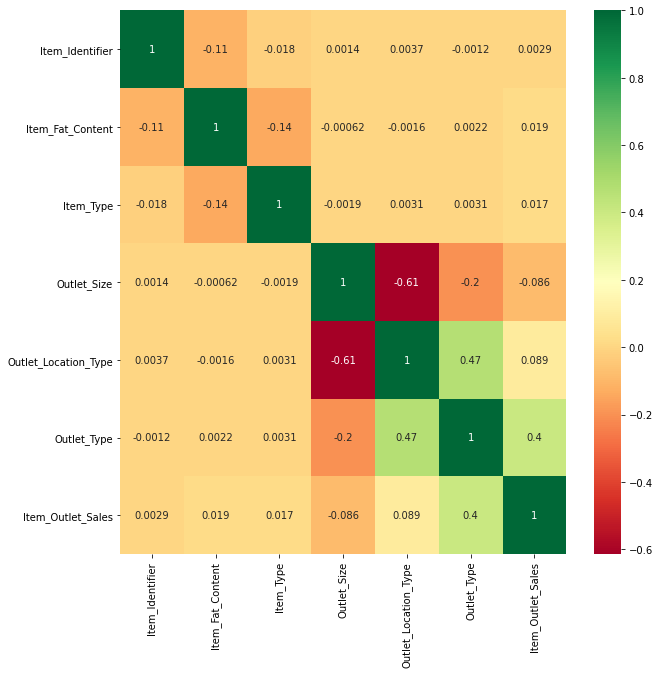

In [29]:
import seaborn as sns
X = categorical_data.iloc[:,0:21]  #independent columns
y = categorical_data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = categorical_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(categorical_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
numerical_columns = train_data.select_dtypes(exclude="object")

In [31]:
numerical_columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


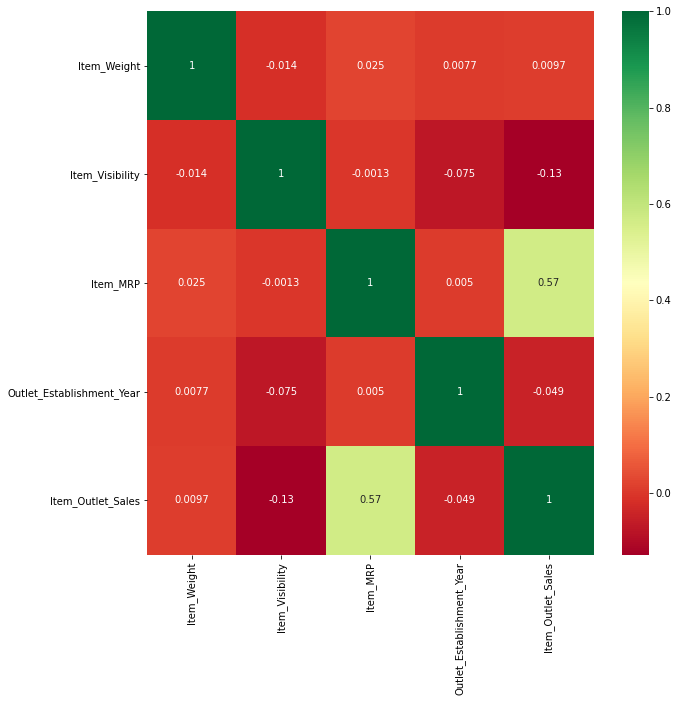

In [32]:
import seaborn as sns
X = numerical_columns.iloc[:,0:21]  #independent columns
y = numerical_columns.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = numerical_columns.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(numerical_columns[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
cols = numerical_columns.columns

In [34]:
cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

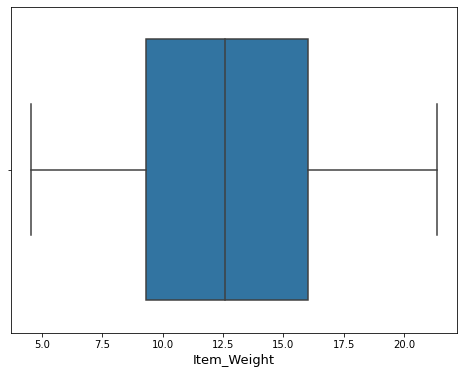

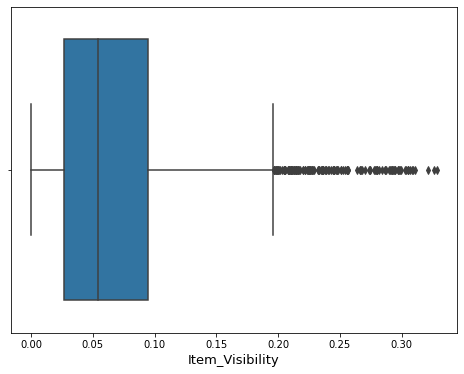

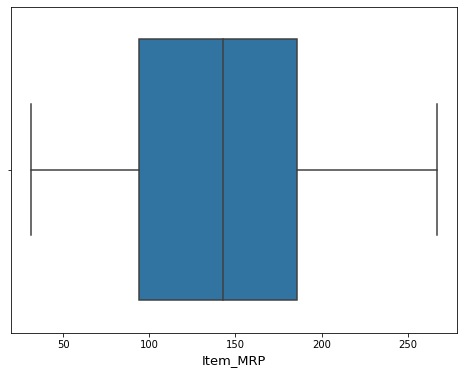

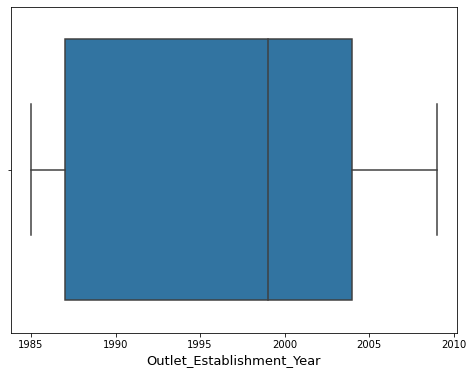

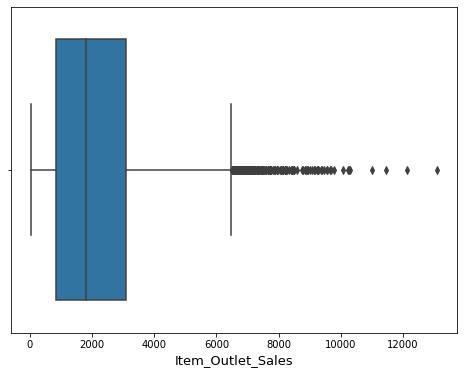

In [35]:
for i in cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=train_data,x=i)
    plt.xlabel(i,fontsize=13)

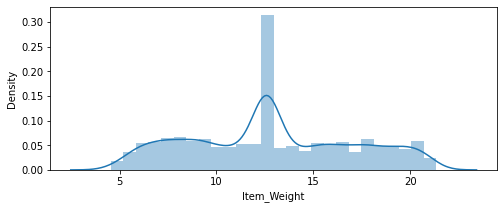

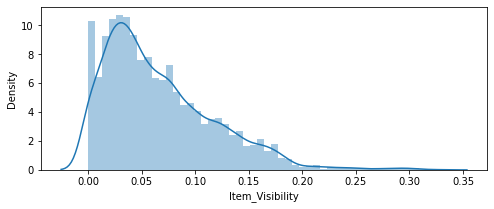

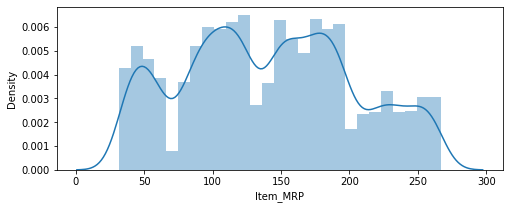

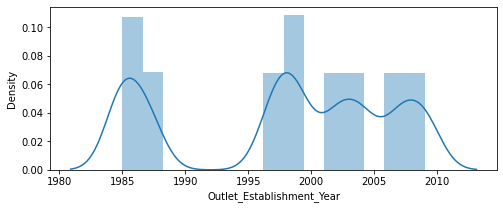

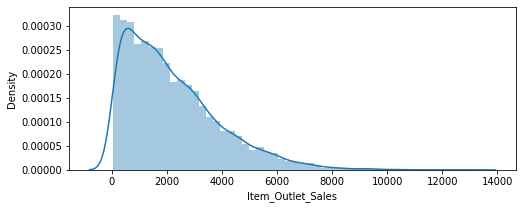

In [36]:
for i in cols:
    plt.figure(figsize=(8,3))
    sns.distplot(train_data[i])

In [37]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [38]:
no_need=["Item_Identifier"]

In [39]:
train_data.drop(no_need,axis=1,inplace=True)

In [40]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [41]:
def remove(dataframe,column):
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 + (1.5 * IQR)
    df_no_outliers = dataframe[(dataframe[column]>lower) & (dataframe[column]<upper)]
    return df_no_outliers

In [42]:
final_data=pd.get_dummies(train_data,drop_first=True)

In [43]:
final_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [44]:
X=final_data.drop(columns=['Item_Outlet_Sales'],axis=1)
Y=final_data['Item_Outlet_Sales']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [48]:
prediction1=model.predict(X_test)

In [49]:
prediction1

array([2574.368964, 1587.36707 , 2579.795234, ..., 2561.305968,
        783.307042, 2178.69734 ])

In [50]:
from xgboost import XGBRegressor

In [51]:
model2=XGBRegressor()
model2.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
prediction2=model2.predict(X_test)

In [53]:
prediction2

array([2550.1716, 1614.2173, 2436.786 , ..., 2613.2144,  678.7184,
       2491.0059], dtype=float32)

In [54]:
#xgb_reg = XGBRegressor()
#xgb_reg.fit(X_train,Y_train)
#xgb_reg.score(X_train,Y_train)

#lin_reg = LinearRegression()
#lin_reg.fit(X, Y)
#lin_reg.score(X, Y)

#rf_reg = RandomForestRegressor()
#rf_reg.fit(X, Y)
#rf_reg.score(X, Y)

#ridge_reg = Ridge(alpha = 0.1)
#ridge_reg.fit(X, Y)
#ridge_reg.score(X, Y)

#lasso_reg = Lasso(alpha = 0.1)
#lasso_reg.fit(X, Y)
#lasso_reg.score(X, Y)

#ab_reg = AdaBoostRegressor(loss = "linear")
#ab_reg.fit(X, Y)
#ab_reg.score(X, Y)

#gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
#gb_reg.fit(X_train,Y_train)
#gb_reg.score(X_train,Y_train)

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,Y_train)
xgb_reg.score(X_train,Y_train)

0.8657528344091577

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.score(X, Y)

0.5637650620863444

In [58]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X, Y)
rf_reg.score(X, Y)

0.9383567220111237

In [59]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X, Y)
ridge_reg.score(X, Y)

0.5637650526371546

In [60]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, Y)
lasso_reg.score(X, Y)

0.5637618407678001

In [61]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X, Y)
ab_reg.score(X, Y)

0.46233746809727605

In [62]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train,Y_train)
gb_reg.score(X_train,Y_train)

0.6570376419560908

In [63]:
import pickle
#file=open("final.pkl","wb")
#pickle.dump(model,file)

In [64]:
# Save the model as serialized object pickle
with open('new.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)